__Name: Daniil Barbiyeru

# Homework 5
__Guideline:__ 
* Please write your name to the __"Name:"__ line above.
* For the questions that require verbal answers, please answer them in their respective answer cells. 
* For the questions that require code, if your code doesn't work, please include a comment describing your algorithm (if code works well, no explanation is needed). 
* This homework is due on __Oct. 28, 2019, 6:00 pm.__ on Monday. You need to upload your completed homework assignment to Sakai until that time.
---

In [2]:
import numpy as np    
import pandas as pd
import datetime as dt  
#import pandas_datareader.data as web             # Downloading data from web
import matplotlib as mpl                         # Plots
import matplotlib.pyplot as plt
import math
import numpy.random as npr  
from scipy import stats   # Needed for cumulative distribution functions (cdf).

ImportError: No module named matplotlib

---

## __Question 1:__  
Suppose there is stock that is currently trading at 200 dollars per share. A year later, we expect that the stock's price can fall anywhere between 100 to 300 dollars per share. We also have the following European options trading on the stock, each with one year left to expiry:
* Five call options, with strike prices and premiums in parentheses: 120 (50), 160 (40), 200 (30), 240 (20), and 280 (10).
* Five put options, with strike prices and premiums in parentheses: 120 (10), 160 (20), 200 (30), 240 (40), and 280 (50).

The following questions ask the construction of a strategy from the below table. There can be multiple ways to construct a given strategy. Any answer that correctly resembles the asked strategy is accepted.

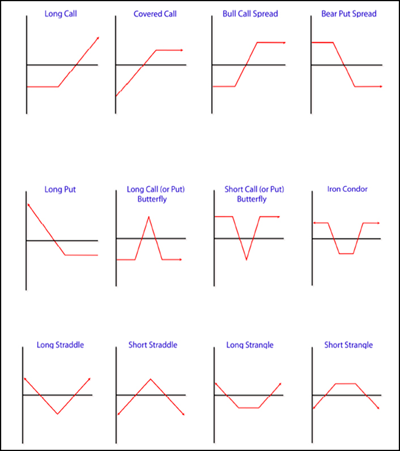

a) Construct an options strategy that replicates the profits and losses (P\&L) of Bull Call Spread strategy. Plot the P\&L diagram.

In [1]:
def call_pl(ST, K, premium = 0):
    return np.maximum(ST - K, 0) - premium
def put_pl(ST, K, premium = 0):
    return np.maximum(K - ST, 0) - premium

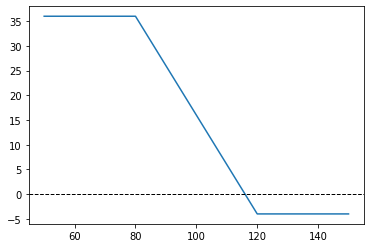

In [5]:
ST = np.arange(50, 151, 1)
portfolio_pl = put_pl(ST, 120, 10) + put_pl(ST, 80, 6) * -1
plt.plot(ST, portfolio_pl)
plt.axhline(y=0, color = 'k', linestyle='--', lw = 1);

b) Construct an options strategy that replicates the profits and losses (P\&L) of Iron Condor strategy. Plot the P\&L diagram.

---

## Question 2:
Define a function that prices European options with dynamic simulation method. You may use the following parameters:

In [ ]:
S0 = 100.                # Stock price at the beginning
r = 0.05                 # Risk-free interest rates (or discount rate)
sigma = 0.25             # Standard deviation of stock price
T = 1.0                  # Maturity of the option (for European options, this is also the exercise date)
M = 50                   # Number of time periods for discretization
K = 100                  # Strike price of the call option

Now, run this function with 10 simulations as well as with 100,000 simulations ($I=10$ vs. $I=100000$). Is there a significant difference between the option prices in these two scenarios? Which price is more accurate, and why? (You may refer to the BSM model price as the criteria for accuracy) 

## Question 3:
a) Define a function that calculates the payoffs of European put options. You may start with the BSM model we used in lecture notes to define this function. 

b) Now, suppose we have a stock that can take prices between 0 and 200 dollars until the end of next year. Assume that the stock also has a standard deviation of returns of 30%, and that risk-free interest rate is 2%.
The stock also has a European put option trading on, that has a strike price of $100 and maturity of 1 year.

Plot the payoff diagram of the option today, and on the expiration date (maturity). If the option premium today is $5, plot the interval of stock prices that would be a good investment to long this option.

---

## Question 4:
Update the BSM function for European calls and puts we constructed in the class, so that it provides the profits and losses of options as well (instead of only the expected payoff).

Now, suppose we have a stock that can take prices between 0 and 200 dollars until the end of next year.
Assume that the stock also has a standard deviation of returns of 30\%,
And that risk-free interest rate is 2\%. The stock also has a European call and put options trading on it, that both have strike price of 100 dollars and maturity of 1 year. Each option has a premium of 20 dollars.

Plot the profit and loss of diagram of the strategy that shorts 1 call and 1 put option on this stock. 

---

## Question 5:
Suppose stock A is trading at 200 dollars per share today. 
Its price can go up or down by 10\% each year, with 50\% probability for each direction.
A European put on stock A, with 2 years until expiration date has a strike price of \$220.

If the risk-free interest rate is 1%, what would be the price of this option?

In [7]:
def binomial_model_call(S0, K, u, r, T):
    d = 1 / u
    p = (1 + r - d) / (u - d)
    q = 1 - p
    # Make stock price tree
    stock = np.zeros([T + 1, T + 1])
    for i in range(T + 1):
        for j in range(i + 1):
            stock[j, i] = S0 * (u ** (i - j)) * (d ** j)
    # Generate option prices recursively
    option = np.zeros([T + 1, T + 1])
    option[:, T] = np.maximum(np.zeros(T + 1), (stock[:, T] - K))
    for i in range(T - 1, -1, -1):
        for j in range(0, i + 1):
            option[j, i] = (1 / (1 + r) * (p * option[j, i + 1] + q * option[j + 1, i + 1]))
    return option[0, 0]

In [12]:
binomial_model_call(200, 100, 1.1, 0.01, 2)

101.97039505930792